In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from dataloader import prepare_data, create_generators, visualize_images


# Select classes and prepare data
classes = ["Angelina Jolie", "Brad Pitt", "Denzel Washington",
           "Hugh Jackman", "Jennifer Lawrence"]
prepare_data(classes)

# Create data generators
train_dir = "train_data"
test_dir = "test_data"
train_generator, test_generator = create_generators(train_dir, test_dir)

Found 496 images belonging to 5 classes.
Found 240 images belonging to 5 classes.


In [5]:
from tensorflow.keras.models import load_model

# If you have saved the baseline model
model = load_model("baseline_model.h5")

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 496 images belonging to 5 classes.


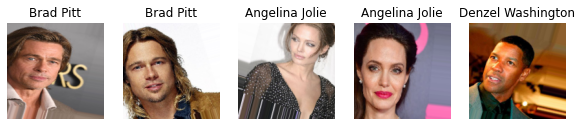

Epoch 1/10


C:\Users\sarah\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - accuracy: 0.3344 - loss: 1.8549 - val_accuracy: 0.7458 - val_loss: 1.0756
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.4032 - loss: 1.4230 - val_accuracy: 0.7417 - val_loss: 0.8401
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.4234 - loss: 1.3894 - val_accuracy: 0.7625 - val_loss: 0.8374
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.3997 - loss: 1.4057 - val_accuracy: 0.7333 - val_loss: 0.8387
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.4848 - loss: 1.2592 - val_accuracy: 0.6958 - val_loss: 0.7932
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - accuracy: 0.5076 - loss: 1.2122 - val_accuracy: 0.8250 - val_loss: 0.6409
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.5305 - loss: 1.1949 - val_accuracy: 0.6958 - val_loss: 0.7932
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.5007 - loss: 1.1713 - val_accuracy: 0.7375 - val

In [6]:
# Define data generators for train and test data with augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

# Visualize the augmented images to ensure they look reasonable
visualize_images(train_generator_augmented)

# Now train the model using the augmented data
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)

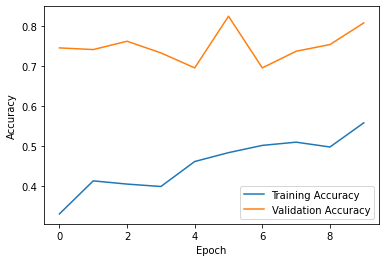

In [7]:
import matplotlib.pyplot as plt

# Learning Curves
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save("augmented_model.h5")  # Save the augmented model